#### `1.Neccesary Data Import`

In [20]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

#### `Importing the DataSet`


In [5]:
import pandas as pd
dataset=pd.read_csv("C:\Python\drug classification\drug200.csv")
dataBersih=dataset.replace('?',np.NaN)
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')

dataBersihNew=dataBersih.dropna()
dataBersihNew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


#### `Converts categorical data to numeric`

In [6]:
#X denotes the dataset
X=dataBersihNew[['Age','Sex','BP','Cholesterol','Na_to_K']]
y=dataBersihNew['Drug']

In [7]:
#Check the unique values in the extracted columns:
print(pd.unique(X['Sex']))
print(pd.unique(X['BP']))
print(pd.unique(X['Cholesterol']))

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']


In [25]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['BP'] = le.fit_transform(X['BP'])
X['Cholesterol'] = le.fit_transform(X['Cholesterol'])

C:\Users\Luzza\AppData\Local\Temp\ipykernel_17236\4192650075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = le.fit_transform(X['Sex'])
C:\Users\Luzza\AppData\Local\Temp\ipykernel_17236\4192650075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['BP'] = le.fit_transform(X['BP'])
C:\Users\Luzza\AppData\Local\Temp\ipykernel_17236\4192650075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

#### `Splitting the Dataset into Training Set and Test set`

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#### `Feature Scaling`

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)



#### `Determine the optimal K value`

Text(0, 0.5, 'Accuracy')

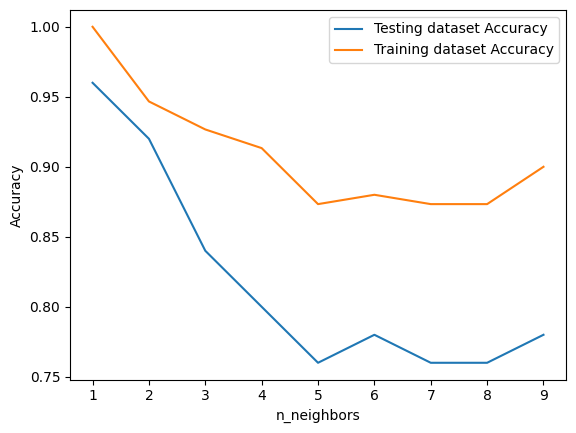

In [11]:
import matplotlib.pyplot as plt
neighbors=np.arange(1,10)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors)) 
#loop over K values
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)

    #compute training and test data accuracy
    train_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)

#generate plot
plt.plot(neighbors,test_accuracy,label='Testing dataset Accuracy')
plt.plot(neighbors,train_accuracy,label='Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

#The accuracy value is closest to perfect when K=0,because K=0 is not possible,K= 2 is used








#### `Looking at the lowest Error`

Minimum error:- 0.04 at K= 0


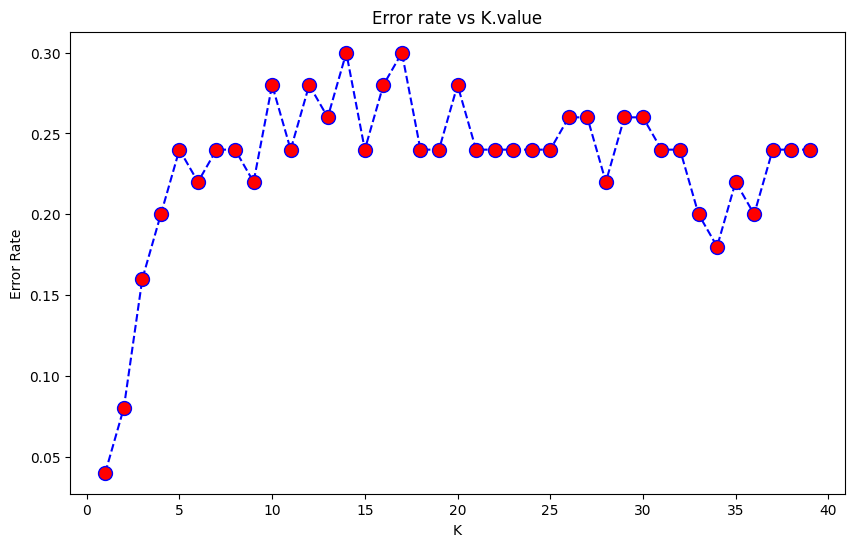

In [12]:

error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',
         marker='o',markerfacecolor='red',markersize=10)    
plt.title('Error rate vs K.value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K=",error_rate.index(min(error_rate)))



#### `looking at the highest accuracy`

Maximum accuracy:- 0.96 at K= 0


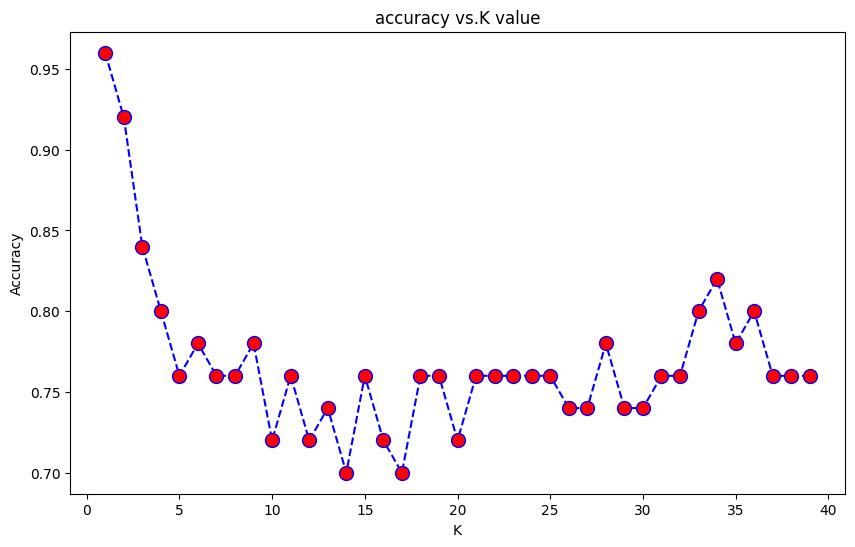

In [13]:
acc=[]
from sklearn import metrics
for i in range(1,40):
    neigh=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test,yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color='blue',linestyle='dashed',
         marker='o',markerfacecolor='red',markersize=10)
plt.title('accuracy vs.K value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K=",acc.index(max(acc)))    

#### `Fitting K-NN to the training set`

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=2,metric='euclidean',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

#### `Make predicitions`

In [15]:

import pandas as pd
y_pred=classifier.predict(X_test)
df_pred=pd.DataFrame(y_pred)
df_pred

,0
0,drugC
1,drugX
2,DrugY
3,DrugY
4,DrugY
5,drugX
6,drugX
7,drugX
8,DrugY
9,drugX


#### `Create a confusion Matrix`

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(cm)
df_cm

,0,1,2,3,4
0,24,0,1,0,0
1,1,4,0,0,0
2,1,0,0,0,0
3,0,0,0,3,0
4,1,0,0,0,15


####  `Include Accuracy`

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       DrugY       0.89      0.96      0.92        25
       drugA       1.00      0.80      0.89         5
       drugB       0.00      0.00      0.00         1
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.94      0.97        16

    accuracy                           0.92        50
   macro avg       0.78      0.74      0.76        50
weighted avg       0.92      0.92      0.92        50



In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.92